<a href="https://colab.research.google.com/github/sunil1206/Data-science-mini-projects/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_excel('/content/E-commerce.xlsx')
df

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862,268465,44459,4602,11,3040,2018-11-15 00:00:00,422,old,0,0
1,2018-10-18 14:27:00,android,63410,268465,44459,3513,12,6822,2018-11-15 00:01:00,467,latest,1,1
2,2018-10-18 14:43:00,android,71748,268465,44459,825,17,1619,2018-11-15 00:02:00,259,intermediate,1,0
3,2018-10-18 14:46:00,android,69209,268465,44459,2355,13,5264,2018-11-15 00:02:00,244,latest,1,0
4,2018-10-18 14:46:00,android,62873,268465,44459,1267,17,10239,2018-11-15 00:02:00,473,latest,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,android,8146,284263,5754,2125,13,1762,2018-11-15 09:46:00,207,latest,1,0
2021,2018-11-03 12:39:00,android,43622,284263,28621,2874,10,9375,2018-11-15 09:46:00,207,latest,1,0
2022,2018-11-03 12:41:00,android,12923,284263,28621,6105,17,2637,2018-11-15 09:46:00,3,latest,1,0
2023,2018-10-20 22:59:00,android,26523,418685,36253,3444,7,2037,2018-11-15 09:47:00,207,latest,0,0


In [ ]:
df.describe().round(2)

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2025.00,2025.00,2025.00,2025.00,2025.00,2025.00,2025.00,2025.00,2025.00
mean,46726.99,547414.95,63519.06,6658.90,10.29,5358.94,244.72,0.34,0.05
std,26395.01,310791.07,36838.22,17292.39,4.96,3075.50,124.45,0.47,0.22
min,10.00,1694.00,176.00,16.00,0.00,6.00,1.00,0.00,0.00
25%,24853.00,273807.00,33864.00,1465.00,7.00,2765.00,190.00,0.00,0.00
50%,46251.00,544037.00,62896.00,2425.00,11.00,5353.00,207.00,0.00,0.00
75%,69412.00,799264.00,91322.00,4793.00,14.00,8121.00,371.00,1.00,0.00
max,92508.00,1089219.00,132865.00,239360.00,17.00,10573.00,508.00,1.00,1.00


In [ ]:
df.isnull().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
user_id,1.000000,0.002357,-0.003168,0.014984,-0.019714,0.006344,0.001983,0.013206,-0.019109
session_id,0.002357,1.000000,0.024115,-0.004718,-0.028275,0.015980,-0.004847,0.014515,-0.003688
item_id,-0.003168,0.024115,1.000000,0.011587,0.020161,-0.017525,-0.029389,-0.022003,0.000510
item_price,0.014984,-0.004718,0.011587,1.000000,0.050027,-0.022866,0.010713,-0.019272,0.043398
category,-0.019714,-0.028275,0.020161,0.050027,1.000000,-0.013163,0.003524,-0.011385,0.007485
product_type,0.006344,0.015980,-0.017525,-0.022866,-0.013163,1.000000,0.030920,-0.018663,0.040050
app_code,0.001983,-0.004847,-0.029389,0.010713,0.003524,0.030920,1.000000,-0.071782,0.031616
is_4G,0.013206,0.014515,-0.022003,-0.019272,-0.011385,-0.018663,-0.071782,1.000000,-0.002699
is_click,-0.019109,-0.003688,0.000510,0.043398,0.007485,0.040050,0.031616,-0.002699,1.000000


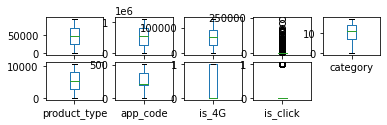

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind='box',subplots=True,layout=(5,5),sharex=False,sharey=False)
plt.show()

In [ ]:
df.shape

(2025, 13)

In [ ]:
df.nunique()

server_time        1715
device_type           1
user_id            1842
session_id          718
item_id             976
item_price          937
category             16
product_type       1101
impression_time     850
app_code            138
os_version            3
is_4G                 2
is_click              2
dtype: int64

In [ ]:
df.drop(['server_time','impression_time','device_type','user_id'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['os_version']= le.fit_transform(df['os_version'])
df.head()

,session_id,item_id,item_price,category,product_type,app_code,os_version,is_4G,is_click
0,268465,44459,4602,11,3040,422,2,0,0
1,268465,44459,3513,12,6822,467,1,1,1
2,268465,44459,825,17,1619,259,0,1,0
3,268465,44459,2355,13,5264,244,1,1,0
4,268465,44459,1267,17,10239,473,1,0,0


In [ ]:
from sklearn import preprocessing
scale= preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled=scale.fit_transform(df)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
# y = target values, last column of the data frame
y = df['is_click']
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
print( classification_report(y_test, pred) )
print( accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       383
           1       0.00      0.00      0.00        22

    accuracy                           0.95       405
   macro avg       0.47      0.50      0.49       405
weighted avg       0.89      0.95      0.92       405

0.945679012345679


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr.score(x_test,y_test)

0.945679012345679

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_value=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_value.append(acc)

In [ ]:
acc_value

[0.9358024691358025,
 0.9432098765432099,
 0.9382716049382716,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679,
 0.945679012345679]

In [ ]:
print('ACCURACY IS:',accuracy_score(y_test,y_pred))

ACCURACY IS: 0.945679012345679


NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier

# Instantiate lr
lr = LogisticRegression(random_state=42)

# Instantiate knn
knn = KNN(n_neighbors=10)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=42)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

from sklearn.metrics import accuracy_score
for clf_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)

    accuracy=accuracy_score(y_test,y_pred)

    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.946
K Nearest Neighbours : 0.946
Classification Tree : 0.946
